**Table of contents**<a id='toc0_'></a>    
- [Missing Values](#toc1_)    
- [Decision metrics](#toc2_)    
- [Source Page Metrics](#toc3_)    
- [Disclosed indicators](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
llama2 = pd.read_excel('./data/Zara_Financial_Sustainability_Report_2023_llama2_topk8_paramsall.xlsx')
llama2.drop(["Unnamed: 0"], axis=1, inplace=True)

llama3 = pd.read_excel('./data/Zara_Financial_Sustainability_Report_2023_llama3_instruct_topk8_paramsall.xlsx')
llama3.drop(["Unnamed: 0"], axis=1, inplace=True)

mistral = pd.read_excel('./data/Zara_Financial_Sustainability_Report_2023_mistral_topk8_paramsall.xlsx')
mistral.drop(["Unnamed: 0"], axis=1, inplace=True)

phi3 = pd.read_excel('./data/zara_phi3_14b-instruct_topk8_paramsall.xlsx')
phi3.drop(["Unnamed: 0"], axis=1, inplace=True)

gpt = pd.read_excel('./data/zara_gpt-4o_topk8_paramsall.xlsx')
gpt.drop(["Unnamed: 0"], axis=1, inplace=True)

In [69]:
llama2["source_texts"].values[10:15]

array([' [BEGIN OF SOURCES]\\n\nPAGE 25: Transition dimension:  RegulatoryâScenario Impact on business model Model assumptions Main mitigationsEstablishing an explicit carbon price is a key mechanism to incentivise the transition to a low-carbon economy. These policies are currently determined and implemented both at national and regional level. The aim is to gradually obtain some degree of international coordination. As a result, the carbon prices used in our models vary from country to country with the aim of covering all global emissions by 2025.In this scenario, the Group would pay a price for the emissions generated throughout its value chain. The Group\'s carbon footprint in each of the countries in which it operates is considered and the carbon price in each jurisdiction is applied. This includes scope 1 (direct emissions from sources owned by the Company), scope 2 (indirect emissions from the electricity purchased) and scope 3 (other indirect emissions related to the Group\'s v

In [70]:
llama3["source_texts"].values[10:15]

array([' [BEGIN OF SOURCES]\\n\nPAGE 25: Transition dimension:  RegulatoryâScenario Impact on business model Model assumptions Main mitigationsEstablishing an explicit carbon price is a key mechanism to incentivise the transition to a low-carbon economy. These policies are currently determined and implemented both at national and regional level. The aim is to gradually obtain some degree of international coordination. As a result, the carbon prices used in our models vary from country to country with the aim of covering all global emissions by 2025.In this scenario, the Group would pay a price for the emissions generated throughout its value chain. The Group\'s carbon footprint in each of the countries in which it operates is considered and the carbon price in each jurisdiction is applied. This includes scope 1 (direct emissions from sources owned by the Company), scope 2 (indirect emissions from the electricity purchased) and scope 3 (other indirect emissions related to the Group\'s v

In [71]:
gpt["source_texts"].values[10:15]

array([' [BEGIN OF SOURCES]\n\nPAGE 6: Our efforts in this connection will come from both inside and outside the value chain, by promoting and fast-tracking regenerative practices, and implementing other nature-based solutions. The weight of each line of action will develop as the frameworks evolve, in accordance with their specific availability and scale, but, in any event, will be consistent with the science and will target emissions that have not been reduced.Mitigation beyond the value chainIn addition to actions implemented in our value chain, it is crucial to develop initiatives that reach beyond our business so as to help mitigate the worst effects of climate change, especially with solutions that foster biodiversity or the well-being of communities.We promote sustainable practices to improve soil health and reduce environmental impacts. Our partnership with WWF focuses on restoring forests and freshwater and marine ecosystems, and thus, we have an agreement12 for more than 10 m

# <a id='toc1_'></a>[Missing Values](#toc0_)

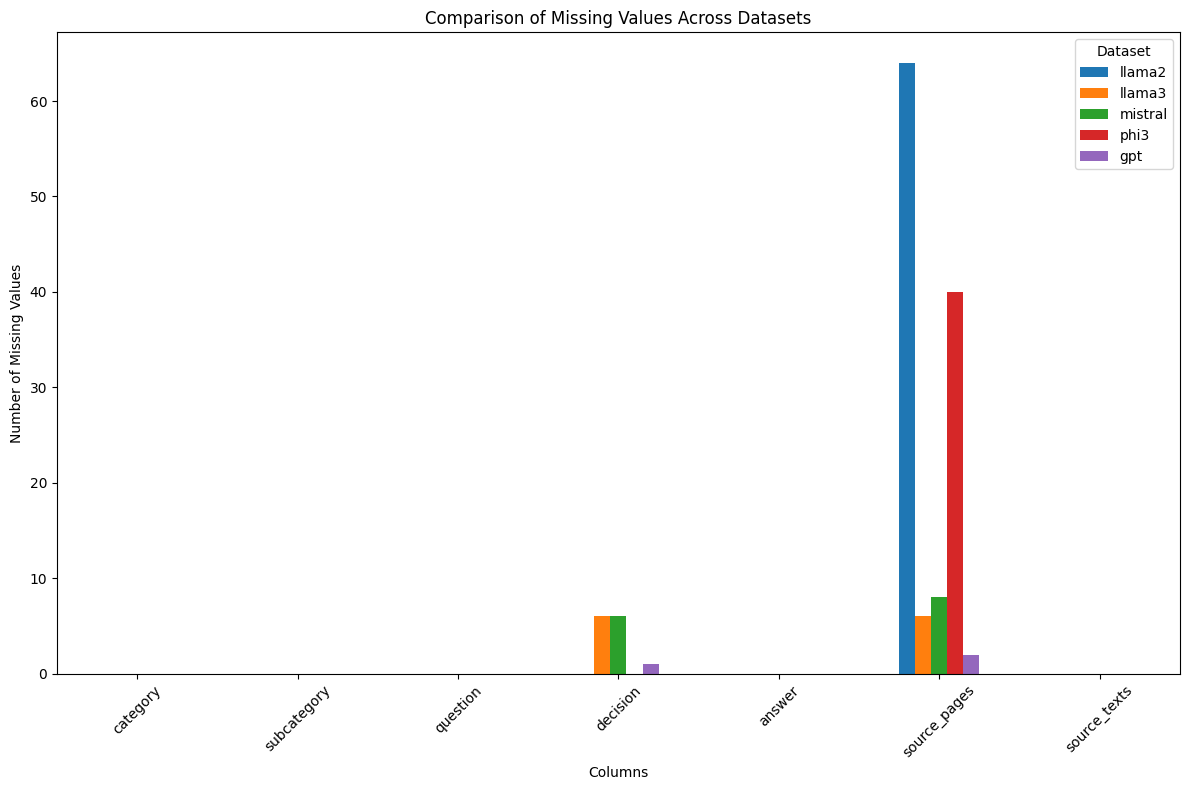

In [72]:

llama2_missing = llama2.isna().sum()
llama3_missing = llama3.isna().sum()
mistral_missing = mistral.isna().sum()
phi3_missing = phi3.isna().sum()
gpt_missing = gpt.isna().sum()


missing_comparison = pd.DataFrame({
    'llama2': llama2_missing,
    'llama3': llama3_missing,
    'mistral': mistral_missing,
    'phi3': phi3_missing,
    'gpt': gpt_missing
}).reset_index()

missing_comparison.columns = ['Column', 'llama2', 'llama3', 'mistral', 'phi3', "gpt"]

missing_comparison.plot(x='Column', kind='bar', figsize=(12, 8))
plt.title('Comparison of Missing Values Across Datasets')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.tight_layout()
plt.savefig('./Missing_Values.png')
plt.show()

llama2 fails to give a single source page

# <a id='toc2_'></a>[Decision metrics](#toc0_)

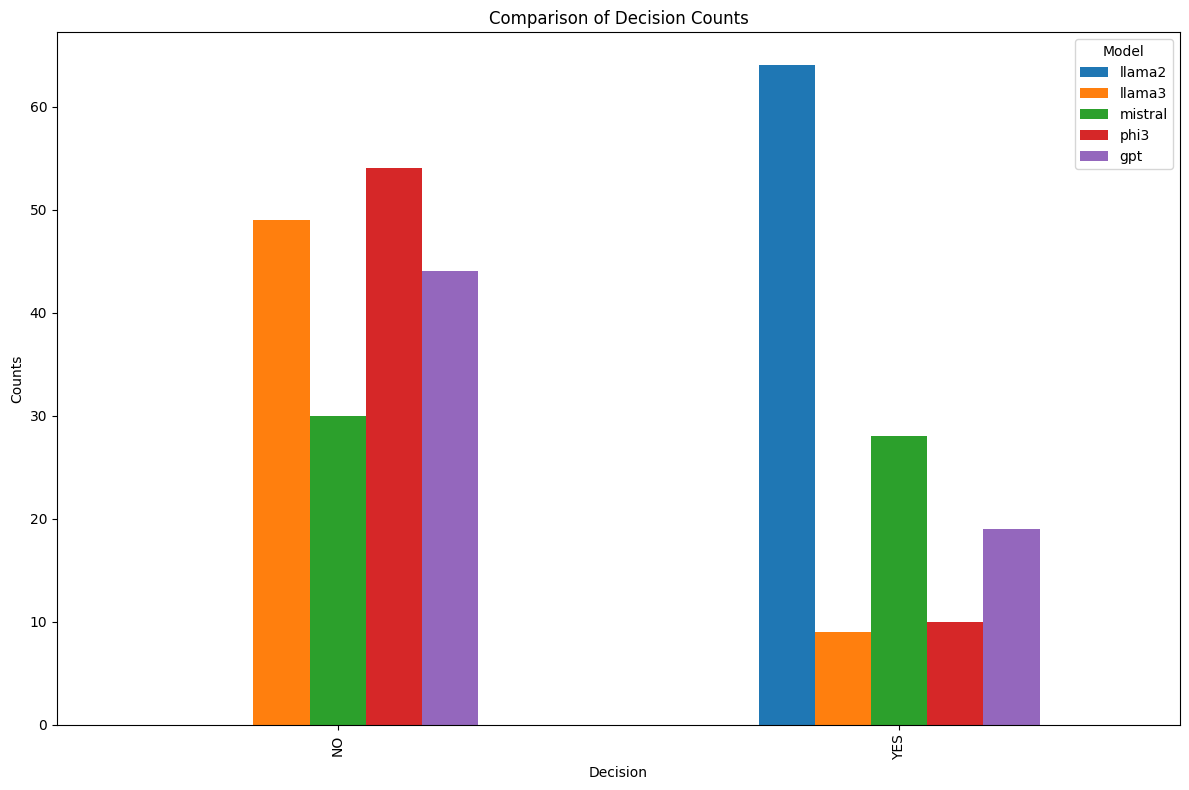

In [73]:
llama2_decision_counts = llama2['decision'].value_counts()
llama3_decision_counts = llama3['decision'].value_counts()
mistral_decision_counts = mistral['decision'].value_counts()
phi3_decision_counts = phi3['decision'].value_counts()
gpt_decision_counts = gpt['decision'].value_counts()


decision_comparison_df = pd.DataFrame({
    'llama2': llama2_decision_counts,
    'llama3': llama3_decision_counts,
    'mistral': mistral_decision_counts,
    'phi3': phi3_decision_counts,
    "gpt" : gpt_decision_counts
})

decision_comparison_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Decision Counts')
plt.xlabel('Decision')
plt.ylabel('Counts')
plt.legend(title='Model')
plt.tight_layout()
plt.savefig('./zara_comparison_decision.jpg')
plt.show()

In [74]:
mistral_missing_indices = mistral[mistral['decision'].isna()].index.tolist()
print("Indices of missing decisions in mistral:", mistral_missing_indices)
mistral_missing_entries = mistral.loc[mistral_missing_indices]
mistral_missing_entries.head(6)

Indices of missing decisions in mistral: [5, 10, 11, 34, 36, 50]


,category,subcategory,question,decision,answer,source_pages,source_texts
5,target,coverage,Does the company report its absolute emission ...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 7: (2) Scope 1, 2 ..."
10,target,offsetting,If carbon credits and offsets are reported to ...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 25: Transition dim...
11,target,offsetting,If carbon credits and offsets are reported to ...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 25: Transition dim...
34,strategy,engagement,Does the company report a strategy and activit...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 35: 6.1.5.4. Metri...
36,strategy,fossil fuels,Does the company state explicitly that it stop...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 12: These certific...
50,tracking,progress,Does the company report its absolute scope 1 G...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 7: (2) Scope 1, 2 ..."


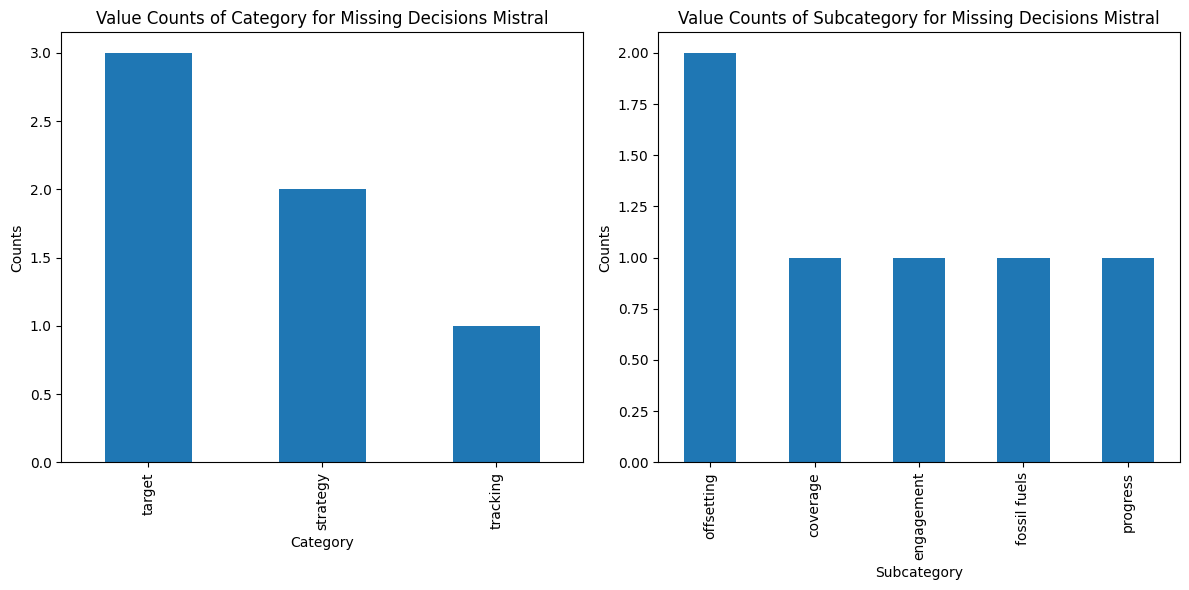

In [75]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
mistral_missing_entries['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Decisions Mistral')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
mistral_missing_entries['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Decisions Mistral')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [76]:
llama3_missing_indices = llama3[llama3['decision'].isna()].index.tolist()
print("Indices of missing decisions in llama3:", llama3_missing_indices)
llama3_missing_entries = llama3.loc[llama3_missing_indices]
llama3_missing_entries.head(6)

Indices of missing decisions in llama3: [9, 19, 36, 38, 49, 62]


,category,subcategory,question,decision,answer,source_pages,source_texts
9,target,pathway,Does the company state explicitly that the int...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 6: Interim milesto...
19,governance,transparency,Does the company report that the climate trans...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 5: And, on the oth..."
36,strategy,fossil fuels,Does the company state explicitly that it stop...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 12: These certific...
38,strategy,fossil fuels,Does the company report a strategy and activit...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 12: These certific...
49,tracking,progress,Does the company report its annual progress of...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 35: 6.1.5.4. Metri...
62,tracking,engagement,Does the company assess and report the alignme...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 5: And, on the oth..."


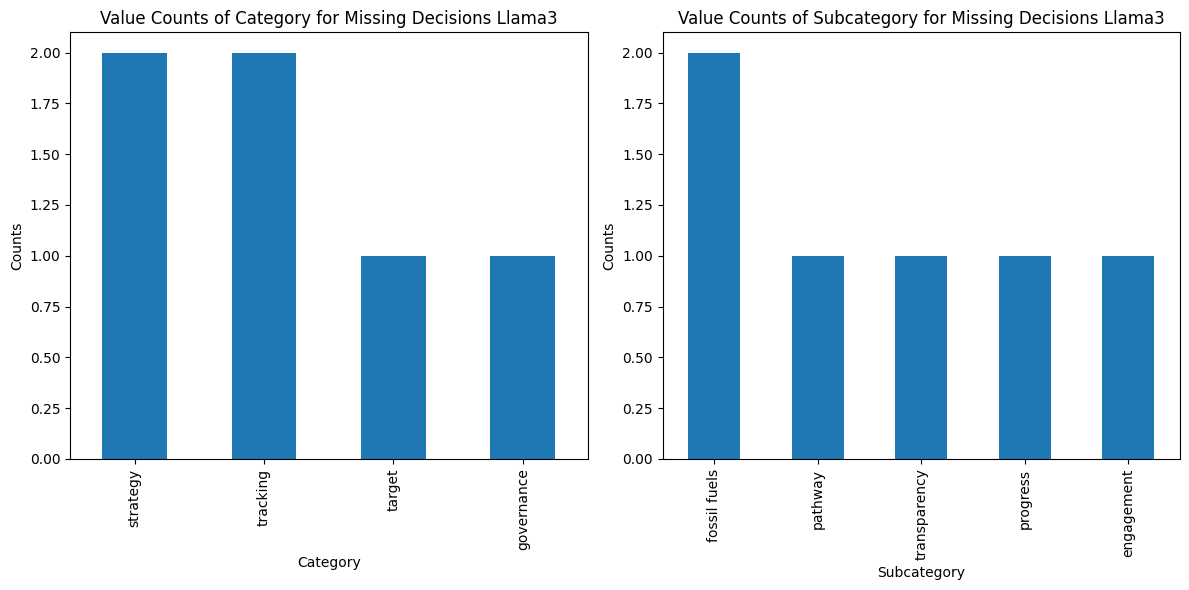

In [77]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
llama3_missing_entries['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Decisions Llama3')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
llama3_missing_entries['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Decisions Llama3')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [78]:
gpt_missing_indices = gpt[gpt['decision'].isna()].index.tolist()
print("Indices of missing decisions in gpt:", gpt_missing_indices)
gpt_missing_entries = gpt.loc[gpt_missing_indices]
gpt_missing_entries.head(6)

Indices of missing decisions in gpt: [11]


,category,subcategory,question,decision,answer,source_pages,source_texts
11,target,offsetting,If carbon credits and offsets are reported to ...,NaN,[[N/A]] The report does not mention the use of...,NaN,[BEGIN OF SOURCES]\n\nPAGE 11: 6.1.4. Lower-i...


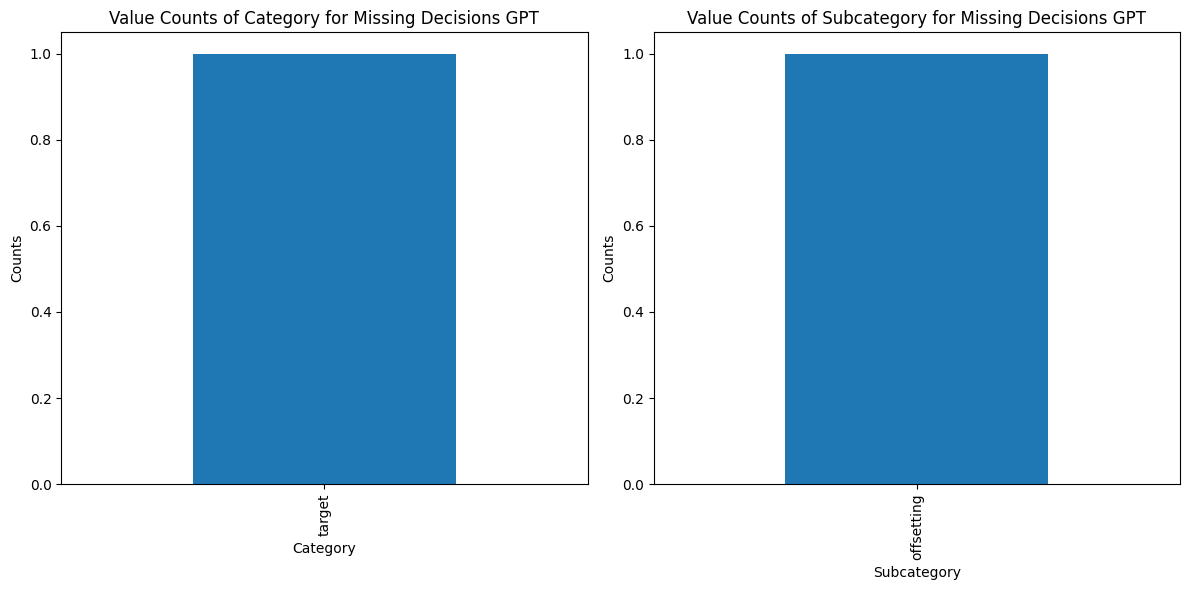

In [79]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
gpt_missing_entries['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Decisions GPT')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
gpt_missing_entries['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Decisions GPT')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

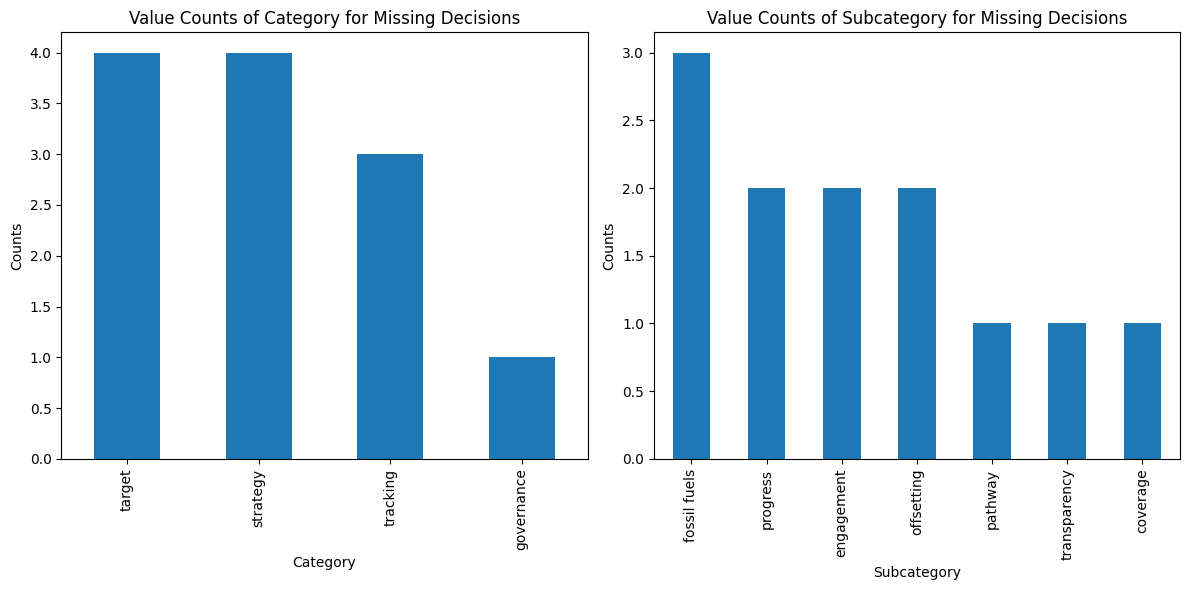

In [80]:
concatenated_missing_decision = pd.concat([llama3_missing_entries, mistral_missing_entries], ignore_index=True)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
concatenated_missing_decision['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Decisions')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
concatenated_missing_decision['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Decisions')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

# <a id='toc3_'></a>[Source Page Metrics](#toc0_)

In [81]:
llama3_missing_source = llama3[llama3["source_pages"].isna()].index
mistral_missing_source = mistral[mistral["source_pages"].isna()].index
phi3_missing_source = phi3[phi3["source_pages"].isna()].index
gpt_missing_source = gpt[gpt["source_pages"].isna()].index

In [82]:
print(f"# missing source page entries for llama3: {len(llama3_missing_source)}")
print(f"# missing source page entries for mistral: {len(mistral_missing_source)}")
print(f"# missing source page entries for phi3: {len(phi3_missing_source)}")
print(f"# missing source page entries for gpt: {len(gpt_missing_source)}")

# missing source page entries for llama3: 6
# missing source page entries for mistral: 8
# missing source page entries for phi3: 40
# missing source page entries for gpt: 2


In [83]:
llama3.iloc[llama3_missing_source].sample(6)

,category,subcategory,question,decision,answer,source_pages,source_texts
9,target,pathway,Does the company state explicitly that the int...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 6: Interim milesto...
19,governance,transparency,Does the company report that the climate trans...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 5: And, on the oth..."
49,tracking,progress,Does the company report its annual progress of...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 35: 6.1.5.4. Metri...
38,strategy,fossil fuels,Does the company report a strategy and activit...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 12: These certific...
36,strategy,fossil fuels,Does the company state explicitly that it stop...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 12: These certific...
62,tracking,engagement,Does the company assess and report the alignme...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 5: And, on the oth..."


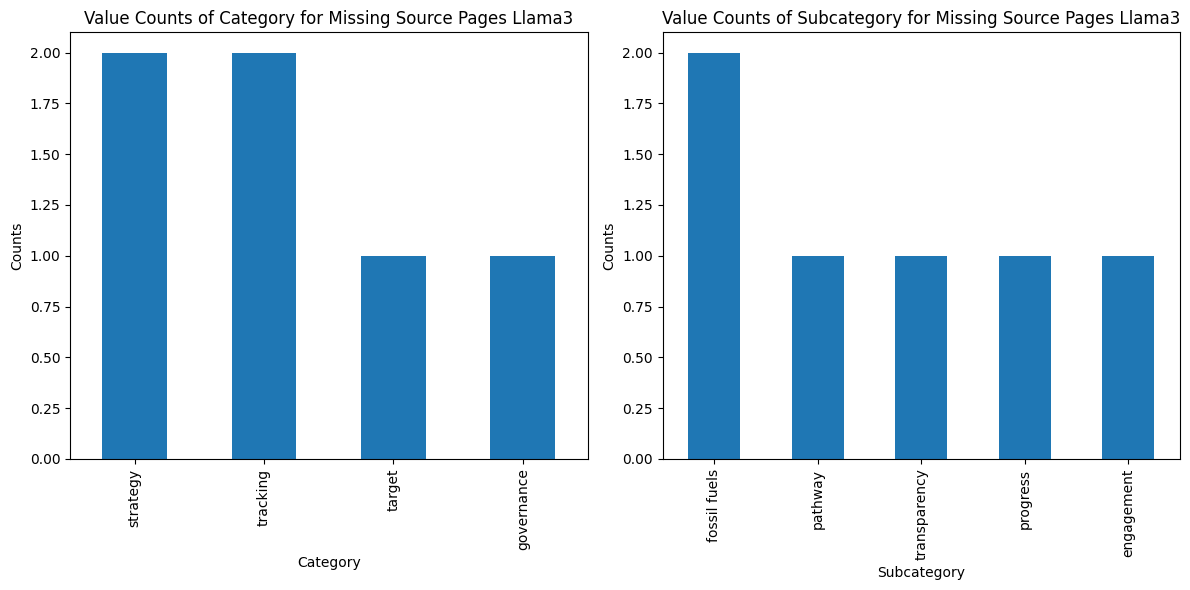

In [84]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
llama3.iloc[llama3_missing_source]['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Source Pages Llama3')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
llama3.iloc[llama3_missing_source]['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Source Pages Llama3')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [85]:
mistral.iloc[mistral_missing_source].sample(6)

,category,subcategory,question,decision,answer,source_pages,source_texts
50,tracking,progress,Does the company report its absolute scope 1 G...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 7: (2) Scope 1, 2 ..."
34,strategy,engagement,Does the company report a strategy and activit...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 35: 6.1.5.4. Metri...
37,strategy,fossil fuels,Does the company report a strategy and activit...,NO,The report does not provide evidence of a comm...,NaN,[BEGIN OF SOURCES]\n\nPAGE 12: These certific...
5,target,coverage,Does the company report its absolute emission ...,NaN,See In Answer,NaN,"[BEGIN OF SOURCES]\n\nPAGE 7: (2) Scope 1, 2 ..."
36,strategy,fossil fuels,Does the company state explicitly that it stop...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 12: These certific...
10,target,offsetting,If carbon credits and offsets are reported to ...,NaN,See In Answer,NaN,[BEGIN OF SOURCES]\n\nPAGE 25: Transition dim...


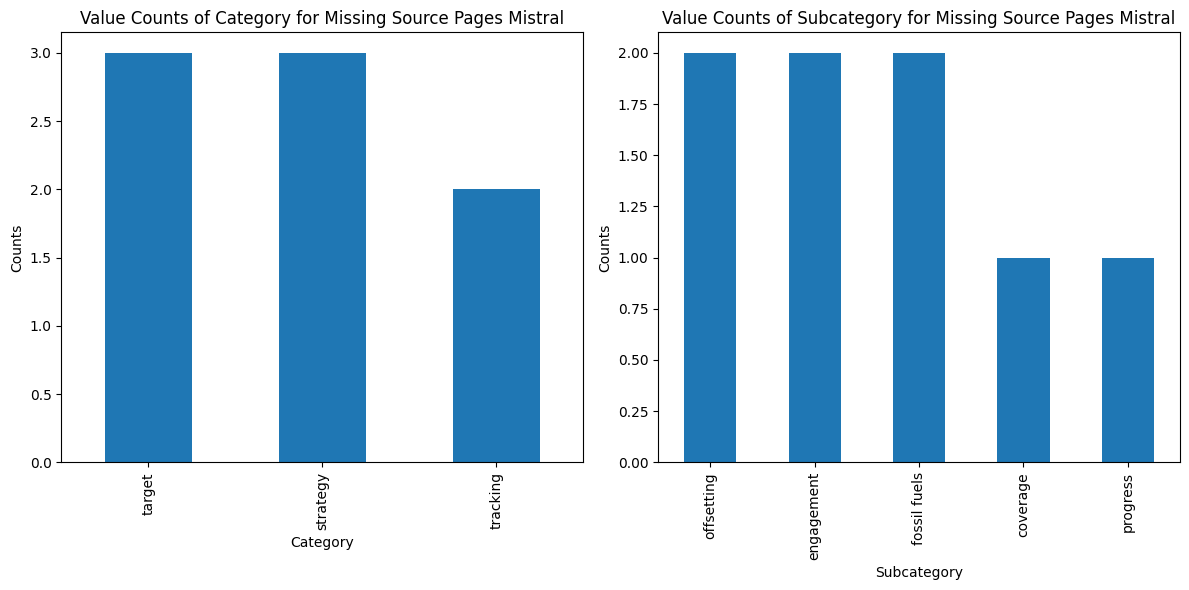

In [86]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
mistral.iloc[mistral_missing_source]['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Source Pages Mistral')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
mistral.iloc[mistral_missing_source]['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Source Pages Mistral')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [87]:
phi3.iloc[phi3_missing_source].sample(6)

,category,subcategory,question,decision,answer,source_pages,source_texts
22,strategy,management,Does the company report quantitative or quanti...,NO,The provided sources from Inditex Group's repo...,NaN,[BEGIN OF SOURCES]\n\nPAGE 35: 6.1.5.4. Metri...
39,strategy,just transition,Does the company report a strategy for a just...,NO,The provided sources from Inditex Group's repo...,NaN,"[BEGIN OF SOURCES]\n\nPAGE 5: And, on the oth..."
34,strategy,engagement,Does the company report a strategy and activit...,NO,The company report does mention collaborations...,NaN,[BEGIN OF SOURCES]\n\nPAGE 35: 6.1.5.4. Metri...
32,strategy,engagement,Does the company report a strategy with specif...,NO,The company report does not provide specific d...,NaN,[BEGIN OF SOURCES]\n\nPAGE 27: Transition dim...
56,tracking,progress,Does the company report the specific drivers a...,NO,The company's report does not provide specific...,NaN,[BEGIN OF SOURCES]\n\nPAGE 7: Emissions calcu...
51,tracking,progress,Does the company report its absolute scope 2 G...,NO,The company's report does not provide specific...,NaN,"[BEGIN OF SOURCES]\n\nPAGE 7: (2) Scope 1, 2 ..."


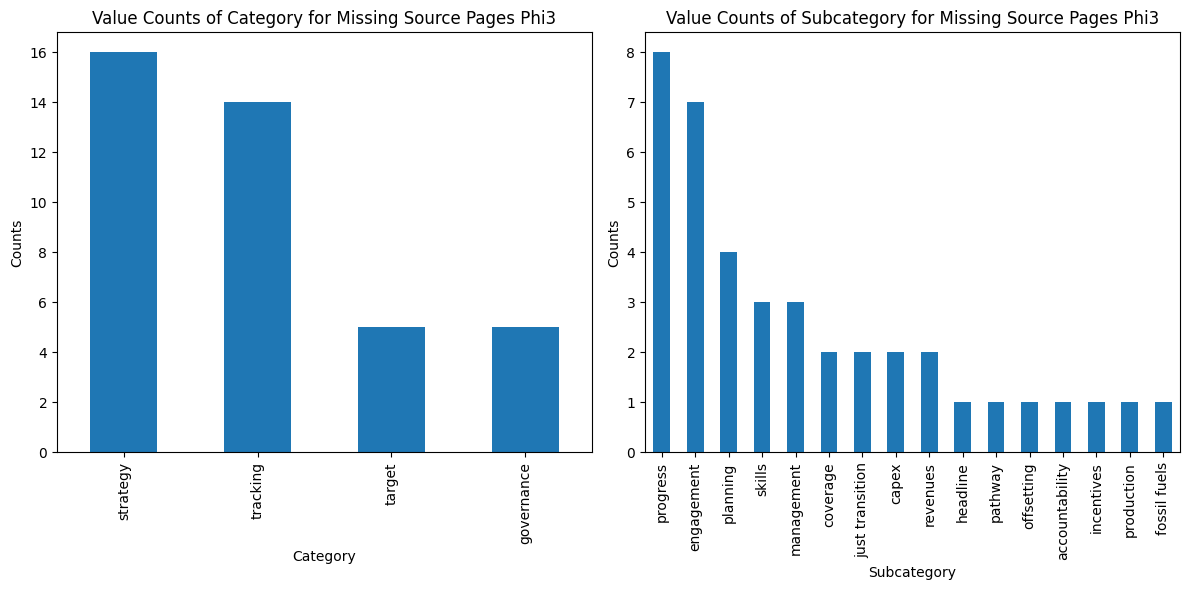

In [88]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
phi3.iloc[phi3_missing_source]['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Source Pages Phi3')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
phi3.iloc[phi3_missing_source]['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Source Pages Phi3')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

In [89]:
overlap_all = set(llama3_missing_source).intersection(set(mistral_missing_source), set(phi3_missing_source))
overlap_llama3_mistral = set(llama3_missing_source).intersection(set(mistral_missing_source))
overlap_llama3_phi3 = set(llama3_missing_source).intersection(set(phi3_missing_source))
overlap_mistral_phi3 = set(mistral_missing_source).intersection(set(phi3_missing_source))

print("Values overlapping in all three lists:", overlap_all)
print("Values overlapping between llama3 and mistral:", overlap_llama3_mistral)
print("Values overlapping between llama3 and phi3:", overlap_llama3_phi3)
print("Values overlapping between mistral and phi3:", overlap_mistral_phi3)

Values overlapping in all three lists: set()
Values overlapping between llama3 and mistral: {36}
Values overlapping between llama3 and phi3: {9, 62, 49}
Values overlapping between mistral and phi3: {34, 10, 37, 63}


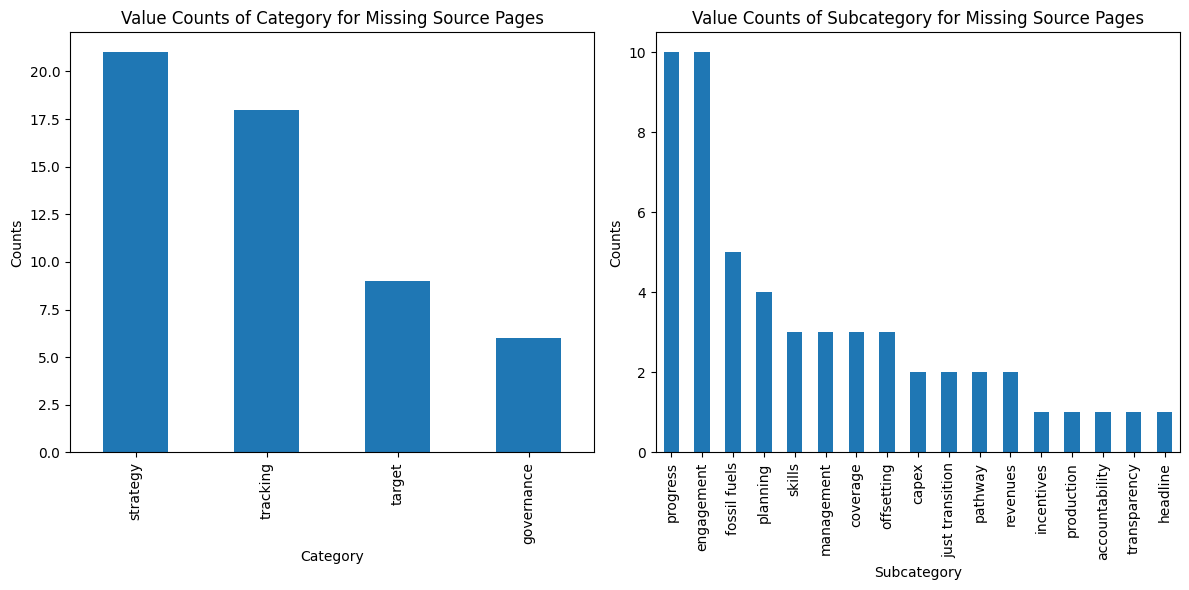

In [90]:
concatenated_missing_source_page = pd.concat([llama3.iloc[llama3_missing_source], mistral.iloc[mistral_missing_source], phi3.iloc[phi3_missing_source]], ignore_index=True)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
concatenated_missing_source_page['category'].value_counts().plot(kind='bar')
plt.title('Value Counts of Category for Missing Source Pages')
plt.xlabel('Category')
plt.ylabel('Counts')

plt.subplot(1, 2, 2)
concatenated_missing_source_page['subcategory'].value_counts().plot(kind='bar')
plt.title('Value Counts of Subcategory for Missing Source Pages')
plt.xlabel('Subcategory')
plt.ylabel('Counts')

plt.tight_layout()
plt.show()

# <a id='toc4_'></a>[Disclosed indicators](#toc0_)

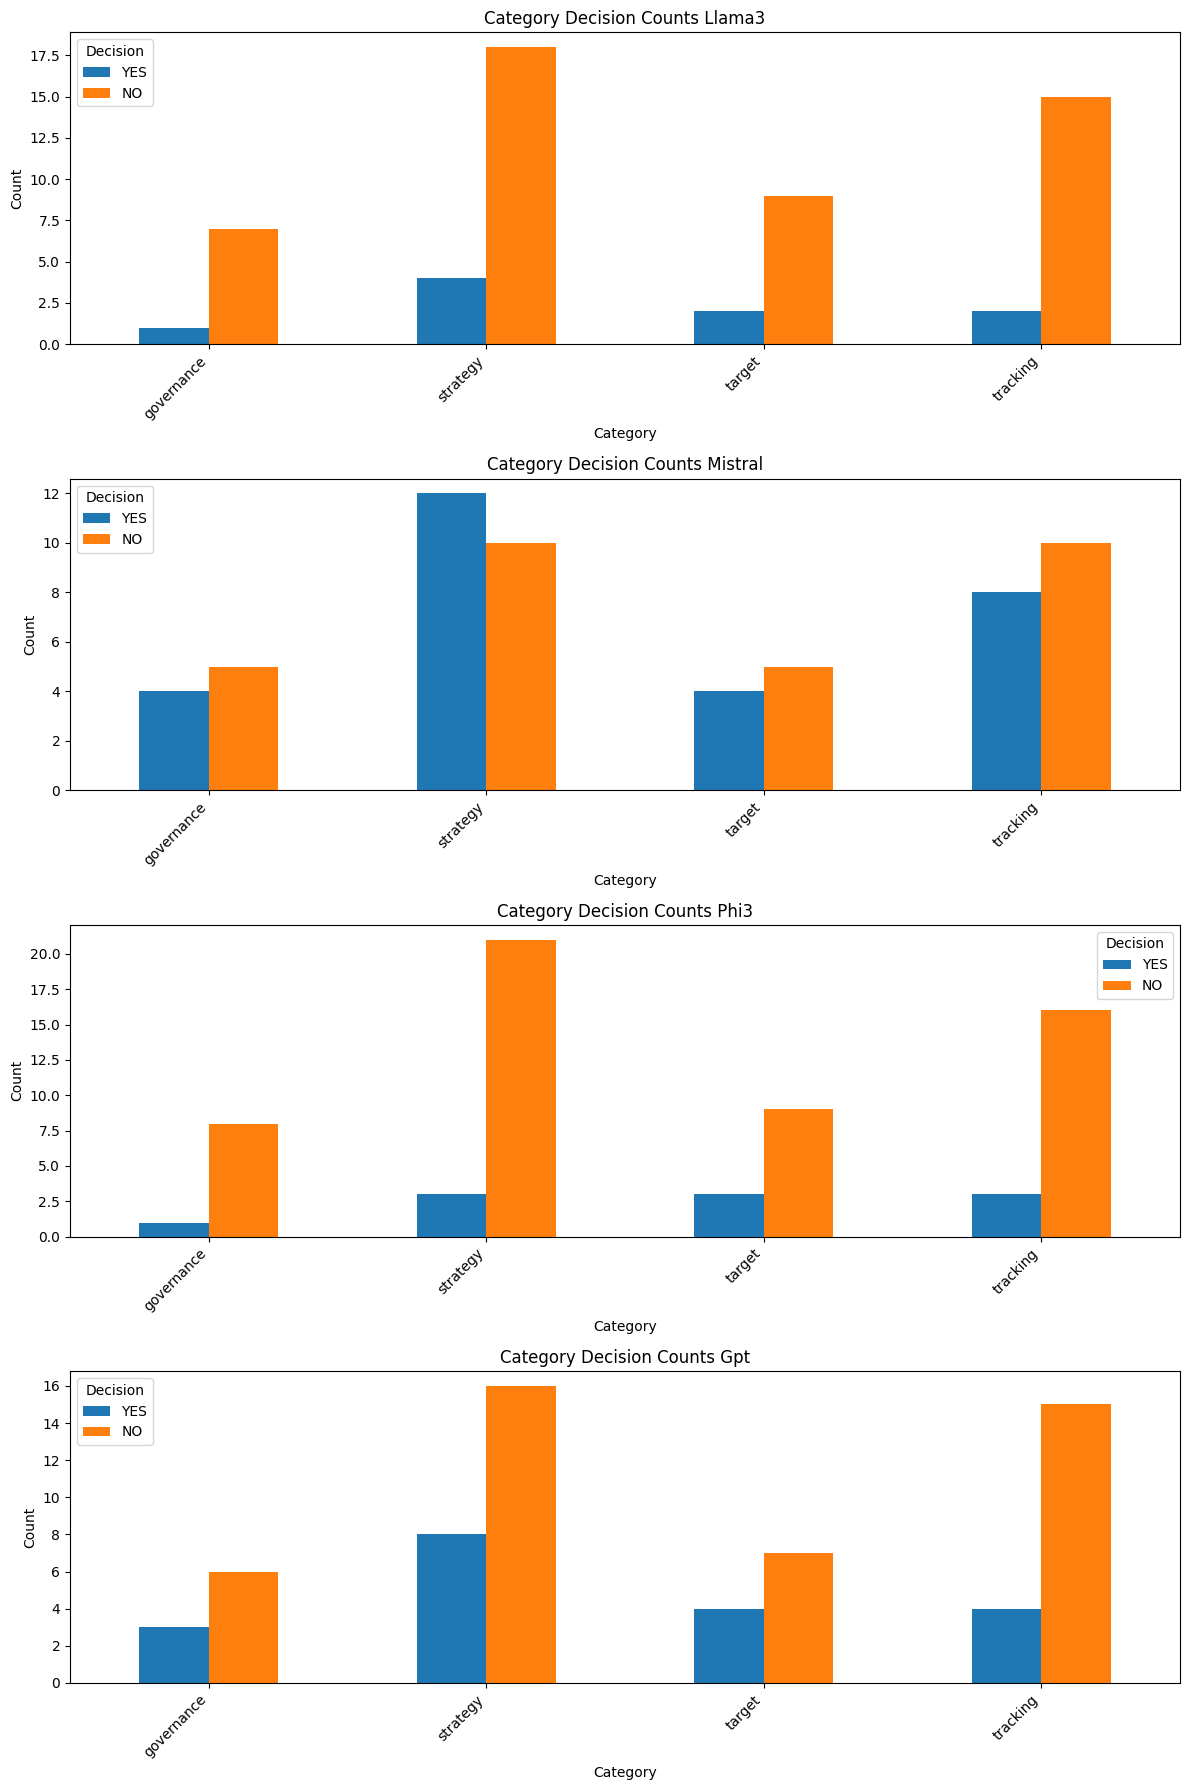

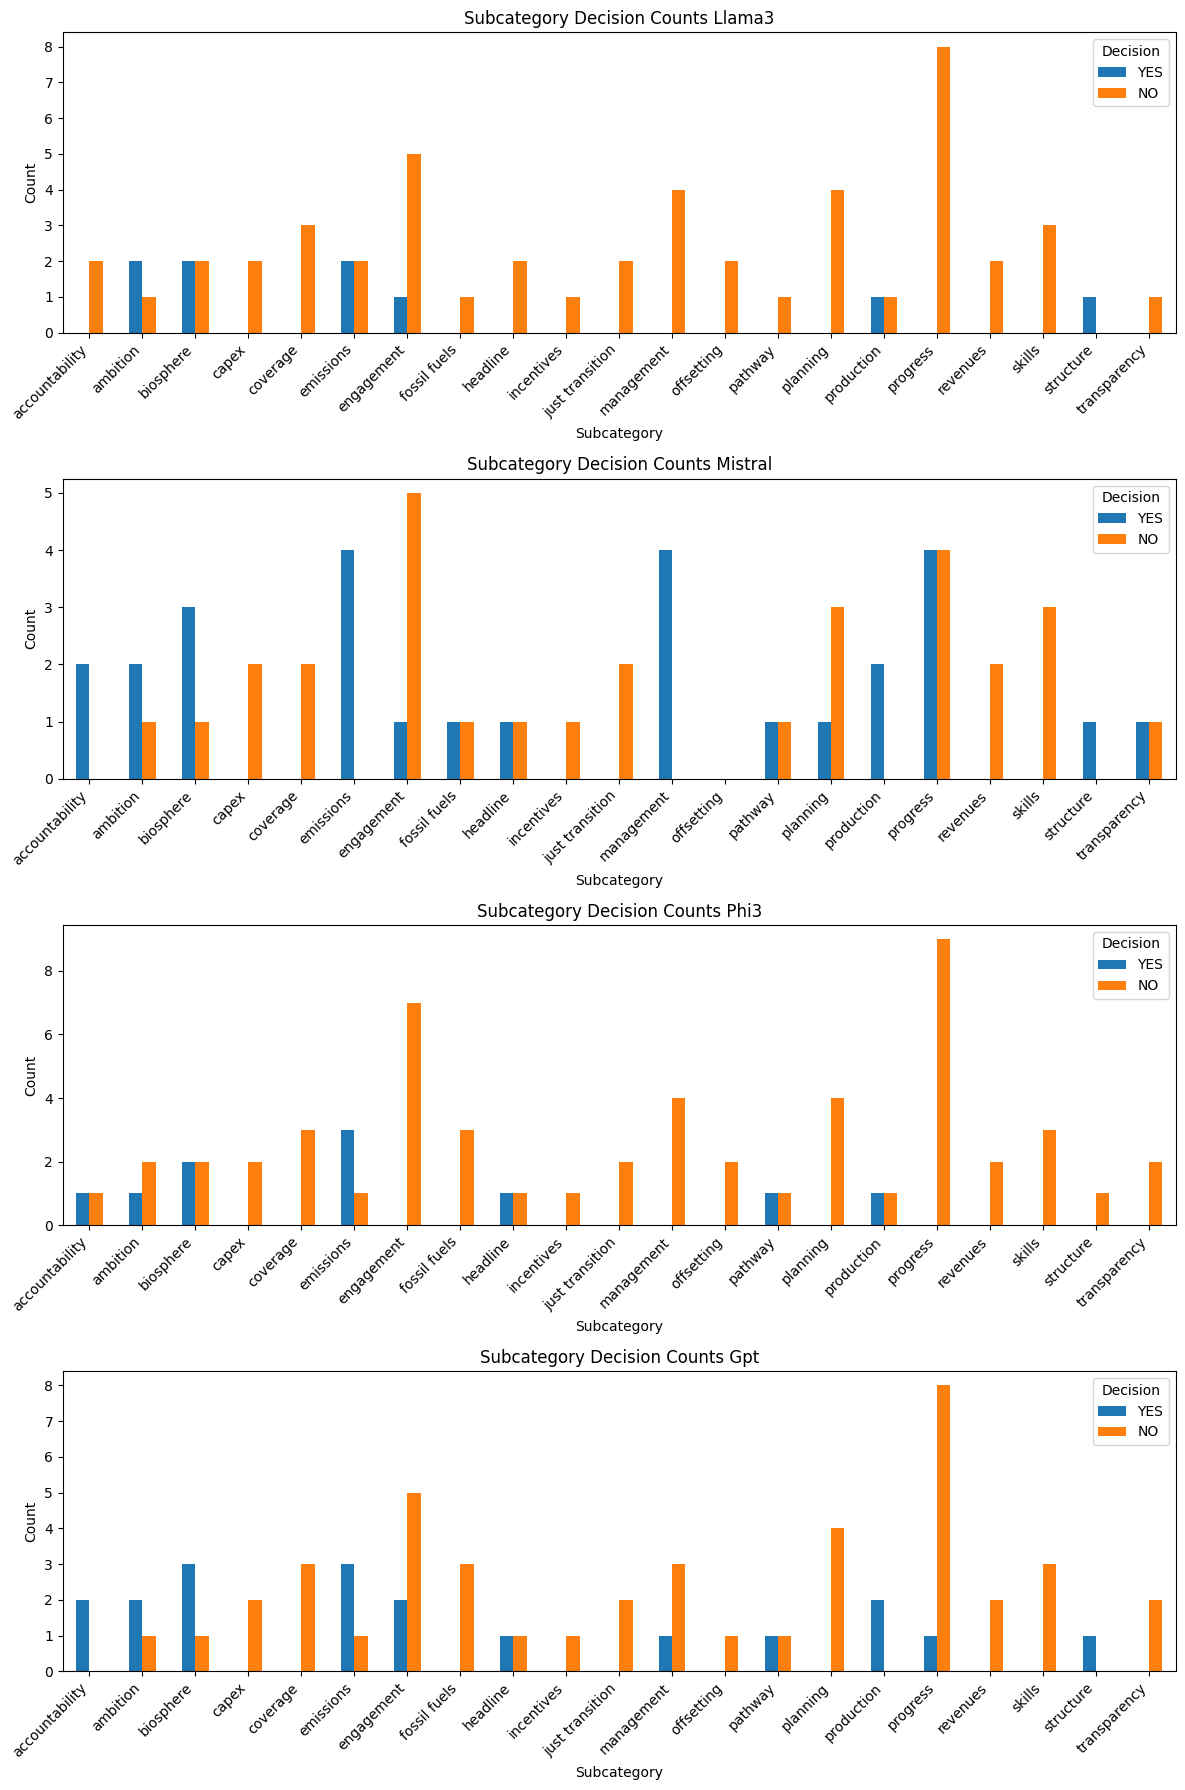

In [91]:
def plot_counts(data, title, ax, column_name, order):
    yes_counts = data[[column_name, "decision"]][data["decision"] == "YES"][column_name].value_counts()
    no_counts = data[[column_name, "decision"]][data["decision"] == "NO"][column_name].value_counts()

    counts_df = pd.DataFrame({
        "YES": yes_counts,
        "NO": no_counts
    })

    counts_df = counts_df.reindex(order)

    counts_df.plot(kind="bar", ax=ax)
    ax.set_title(title)
    ax.set_xlabel(column_name.capitalize())
    ax.set_ylabel("Count")
    ax.set_xticks(range(len(order)))
    ax.set_xticklabels(order, rotation=45, ha="right")
    ax.legend(title="Decision")

all_categories = sorted(llama3["category"].unique())
all_subcategories = sorted(llama3["subcategory"].unique())

fig, axes = plt.subplots(4, 1, figsize=(12, 18))
plot_counts(llama3, "Category Decision Counts Llama3", axes[0], "category", all_categories)
plot_counts(mistral, "Category Decision Counts Mistral", axes[1], "category", all_categories)
plot_counts(phi3, "Category Decision Counts Phi3", axes[2], "category", all_categories)
plot_counts(gpt, "Category Decision Counts Gpt", axes[3], "category", all_categories)
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(4, 1, figsize=(12, 18))
plot_counts(llama3, "Subcategory Decision Counts Llama3", axes[0], "subcategory", all_subcategories)
plot_counts(mistral, "Subcategory Decision Counts Mistral", axes[1], "subcategory", all_subcategories)
plot_counts(phi3, "Subcategory Decision Counts Phi3", axes[2], "subcategory", all_subcategories)
plot_counts(gpt, "Subcategory Decision Counts Gpt", axes[3], "subcategory", all_subcategories)
plt.tight_layout()
plt.show()

# Answer Simularity

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [93]:
def calculate_similarity(main_dataset, ground_truth, dataset_name):
    all_texts = pd.concat([main_dataset['answer'], ground_truth['answer']])

    vectorizer = TfidfVectorizer(min_df=1, stop_words="english")
    tfidf_matrix = vectorizer.fit_transform(all_texts)

    main_dataset_tfidf = tfidf_matrix[:len(main_dataset)]
    ground_truth_tfidf = tfidf_matrix[len(main_dataset):]

    cosine_similarities = cosine_similarity(main_dataset_tfidf, ground_truth_tfidf)

    diagonal_values = np.diagonal(cosine_similarities)

    main_dataset[f"gt_similarity_{dataset_name}"] = diagonal_values

    return main_dataset

In [94]:
llama3 = calculate_similarity(llama3, gpt, "llama3")
llama2 = calculate_similarity(llama2, gpt, "llama2")
phi3 = calculate_similarity(phi3, gpt, "phi3")
mistral = calculate_similarity(mistral, gpt, "mistral")

In [95]:
llama3["gt_similarity_llama3"] = llama3.get("gt_similarity_llama3", pd.Series(dtype=float))
llama2["gt_similarity_llama2"] = llama2.get("gt_similarity_llama2", pd.Series(dtype=float))
phi3["gt_similarity_phi3"] = phi3.get("gt_similarity_phi3", pd.Series(dtype=float))
mistral["gt_similarity_mistral"] = mistral.get("gt_similarity_mistral", pd.Series(dtype=float))

similarity_df = pd.DataFrame({
    "llama3": llama3["gt_similarity_llama3"],
    "llama2": llama2["gt_similarity_llama2"],
    "phi3": phi3["gt_similarity_phi3"],
    "mistral": mistral["gt_similarity_mistral"]
})

similarity_df.sample(10)

,llama3,llama2,phi3,mistral
35,0.527471,0.588471,0.487873,0.426783
0,0.583914,0.608298,0.427672,0.675967
10,0.660317,0.657071,0.627003,0.000000
21,0.413383,0.503634,0.355592,0.408280
14,0.433062,0.390666,0.384917,0.328036
23,0.566016,0.357207,0.268075,0.518027
19,0.000000,0.369700,0.593090,0.424795
55,0.561671,0.353603,0.508077,0.540616
42,0.535608,0.425142,0.443796,0.199651
30,0.598358,0.511714,0.359339,0.413527


In [96]:
def get_mean(ds):
    cols = ds.columns
    avg_list = {}
    for col in cols:
        num_zero = len(ds[ds[col] == 0.0])
        col_sum = ds[col].sum()
        avg = col_sum / (len(ds[col]) - num_zero)
        avg_list[col] = avg
    
    return avg_list

In [97]:
print(get_mean(similarity_df))

{'llama3': 0.4890298121028036, 'llama2': 0.4351992455876189, 'phi3': 0.4669186589874912, 'mistral': 0.4502498401367766}


In [98]:
similarity_df['highest_score_column'] = similarity_df.idxmax(axis=1)
highest_count = similarity_df['highest_score_column'].value_counts()
highest_count

highest_score_column
llama3     23
phi3       16
llama2     13
mistral    12
Name: count, dtype: int64

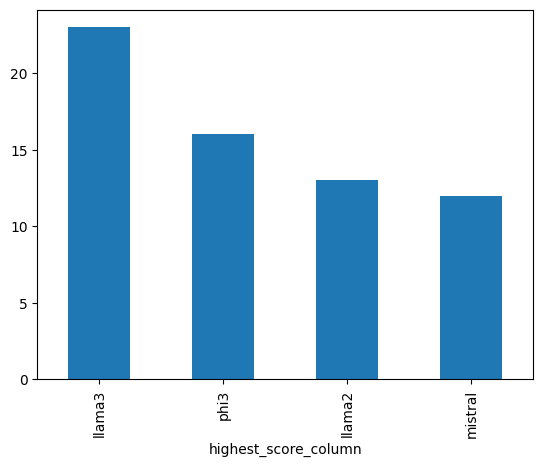

In [99]:
highest_count.plot(kind="bar");
plt.savefig('./highest_count_zara.jpg')

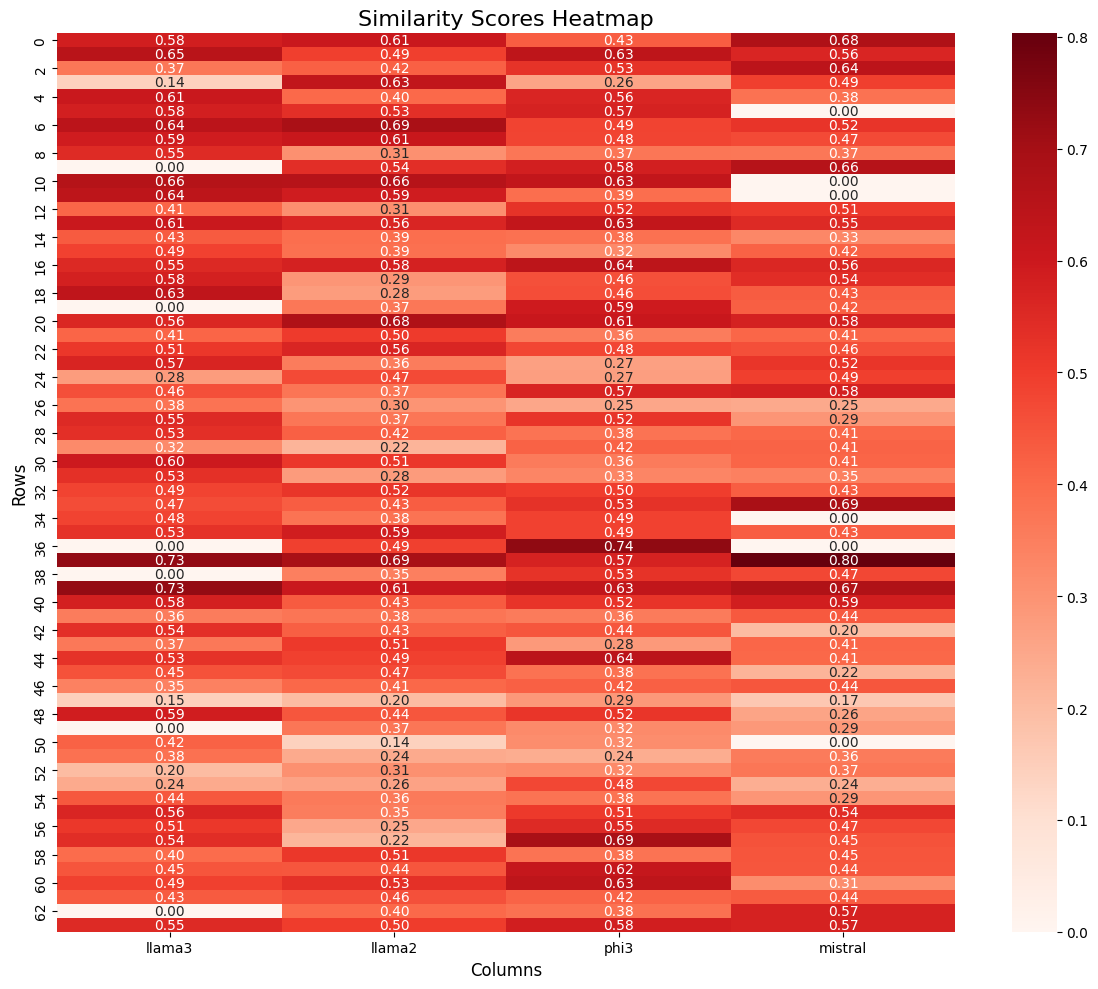

In [100]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df.iloc[:, :-1], annot=True, cmap="Reds", fmt=".2f", cbar=True)

plt.title("Similarity Scores Heatmap", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()